In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('BRCA Data.csv')
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [3]:
df.isnull().sum()

,0
Patient_ID,7
Age,7
Gender,7
Protein1,7
Protein2,7
Protein3,7
Protein4,7
Tumour_Stage,7
Histology,7
ER status,7


In [4]:
df.shape

(341, 16)

In [5]:
# dropping null values
df.dropna(inplace=True)
df.shape

(317, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          317 non-null    object 
 1   Age                 317 non-null    float64
 2   Gender              317 non-null    object 
 3   Protein1            317 non-null    float64
 4   Protein2            317 non-null    float64
 5   Protein3            317 non-null    float64
 6   Protein4            317 non-null    float64
 7   Tumour_Stage        317 non-null    object 
 8   Histology           317 non-null    object 
 9   ER status           317 non-null    object 
 10  PR status           317 non-null    object 
 11  HER2 status         317 non-null    object 
 12  Surgery_type        317 non-null    object 
 13  Date_of_Surgery     317 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      317 non-null    object 
dtypes: float64(5)

As it's a healthcare industry data, replacing the missing values with mean, median or mode is way too risky. So we'll just drop the missing values:

In [7]:
df.Gender.value_counts()

,count
Gender,
FEMALE,313
MALE,4


In [8]:
print('Patient status in %: ')
round(df.Patient_Status.value_counts(normalize=True)*100, 2)

Patient status in %: 


,proportion
Patient_Status,
Alive,80.44
Dead,19.56


So, the dataset is highly imbalanced

In [9]:
Patient_Status = df.Patient_Status.value_counts()
transactions = Patient_Status.index
quantity = Patient_Status.values

figure = px.pie(df,
             values=quantity,
             names=transactions,
             hole = 0.6,
             title="Patient Status")
figure.show()


In [10]:
Tumour_Stage = df.Tumour_Stage.value_counts()
transactions = Tumour_Stage.index
quantity = Tumour_Stage.values

figure = px.pie(df,
             values=quantity,
             names=transactions,
             hole = 0.6,
             title="Tumour Stage")
figure.show()

In [11]:
#Histology
Histology = df.Histology.value_counts()
transactions = Histology.index
quantity = Histology.values
figure = px.pie(df,
             values=quantity,
             names=transactions,
             hole = 0.5,
             title="Histology")
figure.show()

In [12]:
# ER Status
ER_Status = df['ER status'].value_counts()
transactions = ER_Status.index
quantity = ER_Status.values
figure = px.pie(df,
             values=quantity,
             names=transactions,
             hole = 0.5,
             title="ER Status")
figure.show()

In [13]:
# PR status
PR_Status = df['PR status'].value_counts()
transactions = PR_Status.index
quantity = PR_Status.values
figure = px.pie(df,
             values=quantity,
             names=transactions,
             hole = 0.5,
             title="PR Status")
figure.show()

In [14]:
# HER2 status
HER2_Status = df['HER2 status'].value_counts()
transactions = HER2_Status.index
quantity = HER2_Status.values
figure = px.pie(df,
             values=quantity,
             names=transactions,
             hole = 0.5,
             title="HER2 Status")
figure.show()

so we'll drop the Patient ID, ER status, PR status, Date of surgery and date of last visit column

In [15]:
df.drop(['Patient_ID','ER status','PR status', 'Date_of_Surgery', 'Date_of_Last_Visit'], axis=1, inplace=True)
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,Dead
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,Alive
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other,Dead


In [16]:
df.Gender.value_counts()

,count
Gender,
FEMALE,313
MALE,4


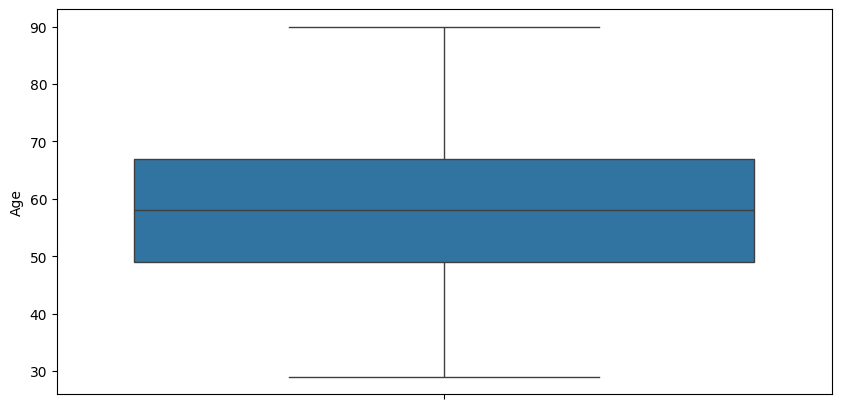

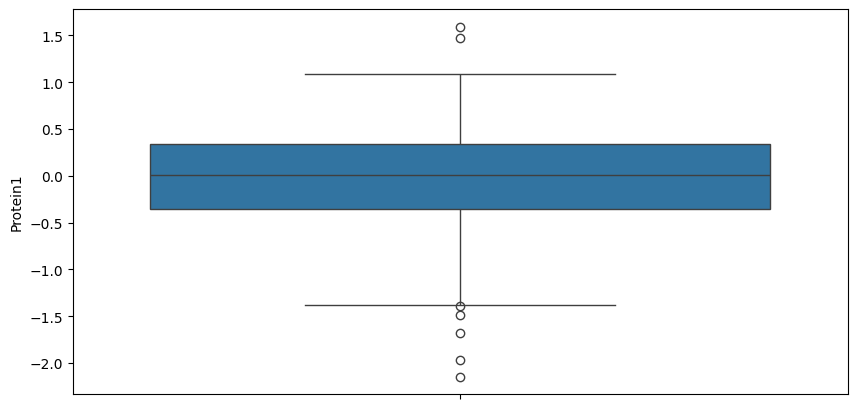

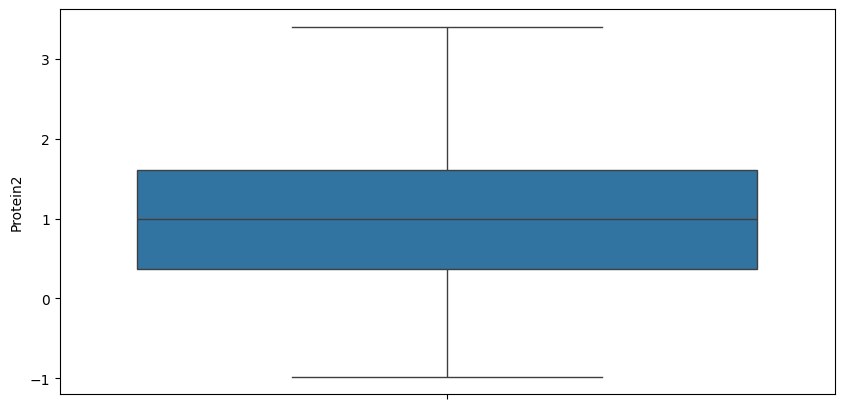

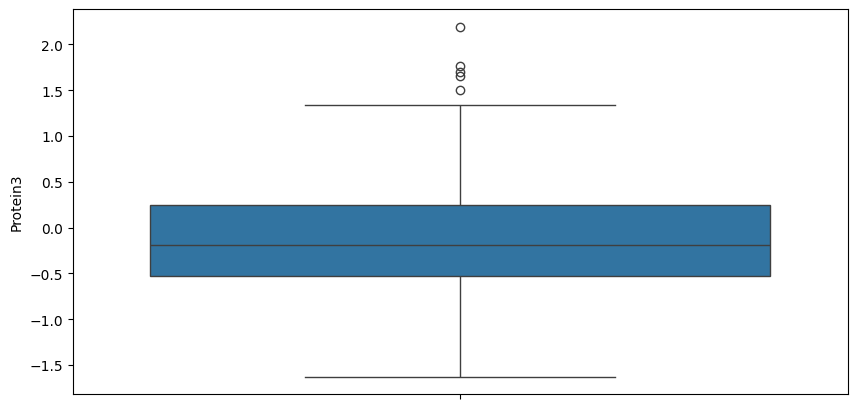

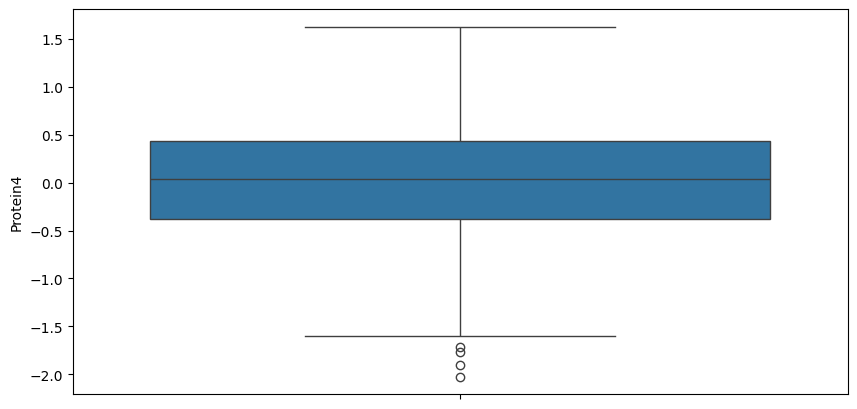

In [17]:
for i in ['Age','Protein1','Protein2','Protein3','Protein4']:
  plt.figure(figsize=(10,5))
  sns.boxplot(df[i])
  plt.show()

# **ydata-profiling**
Automatically generates detailed exploratory data analysis (EDA) reports for any dataset. It:

1. **Summarizes** your data (stats, missing values, data types)
2. **Finds patterns** (correlations, distributions, outliers)
3. **Creates interactive visualizations** (histograms, heatmaps, scatter plots)

---


In [18]:
# pip install ydata-profiling

In [19]:
from ydata_profiling import ProfileReport

In [52]:
ProfileReport(df,title='EDA Report of Breast Cancer Data')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Model Building and Pipeline Creation

# **Explanation of Commands**

**1. `!pip install pycaret`**  
- **What it does**: Installs the PyCaret library  
- **Purpose**: PyCaret is a low-code ML automation toolkit that:  
  - Automates model training/comparison (`compare_models()`)  
  - Simplifies feature engineering & hyperparameter tuning  
  - Supports classification, regression, clustering, etc.  
  - *Example use*: Quickly test 15+ ML models with 1 line of code  

**2. `!pip install mlflow`**  
- **What it does**: Installs the MLflow framework  
- **Purpose**: MLflow is an ML lifecycle management tool that:  
  - Tracks experiments (metrics, parameters, models)  
  - Logs/model registry for version control  
  - Packaging & deployment tools  
  - *Example use*: Compare 100 training runs in a dashboard  

# **Key Relationship**  
PyCaret + MLflow = **AutoML + Tracking**  
- PyCaret handles rapid prototyping  
- MLflow records/model management  
- Often used together for full-cycle ML projects

In [21]:

# !pip install pycaret mlflow --ignore-requires-python

In [22]:
from pycaret.classification import *

In [23]:
cancer = setup(data=df, target='Patient_Status',
               normalize=True,
               transformation=True,
               log_experiment=True,
               remove_multicollinearity=True,
               numeric_imputation= 'median',
               fold = 5,
              #  stratified k-fold cross validation

              #  ignore_features=['Patient_ID'], already did
              #  date_features=['Date_of_Surgery', 'Date_of_Last_Visit'] , already did
              #  fix_imbalance=False,
               train_size=0.70
              )

,Description,Value
0,Session id,2580
1,Target,Patient_Status
2,Target type,Binary
3,Target mapping,"Alive: 0, Dead: 1"
4,Original data shape,"(317, 11)"
5,Transformed data shape,"(317, 18)"
6,Transformed train set shape,"(221, 18)"
7,Transformed test set shape,"(96, 18)"
8,Numeric features,5
9,Categorical features,5


In [24]:
# !pip install mlflow==2.3.1 pycaret --upgrade

# **Building ML Models**

- `lr` • Logistic Regression  
- `knn` • K-Nearest Neighbors Classifier  
- `nb` • Naive Bayes  
- `svm` • SVM (Linear Kernel)  
- `rbfsvm` • SVM (Radial Kernel)  
- `gpc` • Gaussian Process Classifier  
- `mlp` • MLP Classifier  
- `ridge` • Ridge Classifier  
- `rf` • Random Forest Classifier  
- `qda` • Quadratic Discriminant Analysis  
- `ada` • AdaBoost Classifier  
- `lda` • Linear Discriminant Analysis  
- `et` • Extra Trees Classifier  
- `xgboost` • Extreme Gradient Boosting  
- `lightgbm` • Light Gradient Boosting Machine
- `catboost` • Catboost Classifier

In [25]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.5741,0.8000,0.6400,0.7111,0.0000,0.0000
1,0.8182,0.4722,0.8182,0.6694,0.7364,0.0000,0.0000
2,0.8182,0.6163,0.8182,0.6694,0.7364,0.0000,0.0000
3,0.7955,0.4175,0.7955,0.6327,0.7048,0.0000,0.0000
4,0.7955,0.5540,0.7955,0.6327,0.7048,0.0000,0.0000
Mean,0.8055,0.5268,0.8055,0.6489,0.7187,0.0000,0.0000
Std,0.0105,0.0720,0.0105,0.0170,0.0146,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [26]:
# Checking all available configurations:
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [27]:
get_config('y_test')


,Patient_Status
302,Alive
169,Alive
39,Dead
110,Alive
78,Alive
...,...
144,Alive
163,Alive
6,Alive
323,Alive


In [28]:
get_config('target_param')


'Patient_Status'

In [29]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8055,0.5268,0.8055,0.6489,0.7187,0.0000,0.0000,0.3040
dummy,Dummy Classifier,0.8055,0.5000,0.8055,0.6489,0.7187,0.0000,0.0000,0.1360
ridge,Ridge Classifier,0.7964,0.4881,0.7964,0.6475,0.7141,-0.0157,-0.0206,0.1360
lr,Logistic Regression,0.7918,0.4887,0.7918,0.6467,0.7118,-0.0242,-0.0360,0.1400
lda,Linear Discriminant Analysis,0.7873,0.4881,0.7873,0.6460,0.7095,-0.0326,-0.0504,0.1400
et,Extra Trees Classifier,0.7736,0.5249,0.7736,0.6597,0.7088,-0.0319,-0.0443,0.2700
knn,K Neighbors Classifier,0.7735,0.5119,0.7735,0.7317,0.7298,0.0622,0.0917,0.1360
ada,Ada Boost Classifier,0.7422,0.5343,0.7422,0.6851,0.7094,0.0068,0.0023,0.2120
gbc,Gradient Boosting Classifier,0.7374,0.5087,0.7374,0.6775,0.7035,-0.0194,-0.0237,0.2380
lightgbm,Light Gradient Boosting Machine,0.7288,0.4799,0.7288,0.6640,0.6931,-0.0575,-0.0658,0.3300


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=2580, verbose=0,
                       warm_start=False)

In [30]:
# checking manually
rdg = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.4105,0.8000,0.6400,0.7111,0.0000,0.0000
1,0.8182,0.6875,0.8182,0.6694,0.7364,0.0000,0.0000
2,0.7727,0.3681,0.7727,0.6623,0.7133,-0.0784,-0.1029
3,0.7955,0.4190,0.7955,0.6327,0.7048,0.0000,0.0000
4,0.7955,0.5556,0.7955,0.6327,0.7048,0.0000,0.0000
Mean,0.7964,0.4881,0.7964,0.6475,0.7141,-0.0157,-0.0206
Std,0.0145,0.1179,0.0145,0.0154,0.0116,0.0314,0.0411


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [33]:
# model evaluation
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Predictions on new data

In [35]:
unseen_predictions = predict_model(rf, data=df)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9338,0.9407,0.9338,0.9351,0.9296,0.7651,0.7793


,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status,prediction_label,prediction_score
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive,Alive,0.93
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,Dead,Dead,0.70
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,Alive,Alive,0.84
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive,Alive,0.87
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other,Dead,Alive,0.59


Save RF (Pycaret automatically saves as pickle)




In [36]:
save_model(rf,'model_rf')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Protein1', 'Protein2',
                                              'Protein3', 'Protein4'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_featur...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max

In [37]:
from pycaret.classification import load_model
loaded_model = load_model('model_rf')

Transformation Pipeline and Model Successfully Loaded


In [38]:
prediction_from_saved_model = predict_model(loaded_model, data=df)
prediction_from_saved_model.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9338,0.9407,0.9338,0.9351,0.9296,0.7651,0.7793


,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status,prediction_label,prediction_score
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive,Alive,0.93
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,Dead,Dead,0.70
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,Alive,Alive,0.84
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive,Alive,0.87
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other,Dead,Alive,0.59


**Previously we found some unbalanced column, let's try to balance them**

In [39]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(df.drop('Patient_Status', axis=1), df['Patient_Status'])


In [40]:
X_resampled.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other


In [41]:
X_resampled.shape

(510, 10)

In [42]:
y_resampled.shape

(510,)

In [43]:
df2 = pd.concat([X_resampled, y_resampled], axis=1)
df2.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,Dead
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,Alive
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other,Dead


In [44]:
cancer2 = setup(data=df2, target='Patient_Status',
               normalize=True,
               transformation=True,
               log_experiment=True,
               remove_multicollinearity=True,
               numeric_imputation= 'median',
               fold = 5,
                train_size=0.70
              )



,Description,Value
0,Session id,6435
1,Target,Patient_Status
2,Target type,Binary
3,Target mapping,"Alive: 0, Dead: 1"
4,Original data shape,"(510, 11)"
5,Transformed data shape,"(510, 18)"
6,Transformed train set shape,"(357, 18)"
7,Transformed test set shape,"(153, 18)"
8,Numeric features,5
9,Categorical features,5


In [45]:
rf2 = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9444,1.0000,0.9444,0.9500,0.9443,0.8889,0.8944
1,0.9167,0.9853,0.9167,0.9219,0.9164,0.8333,0.8385
2,0.9014,0.9302,0.9014,0.9017,0.9014,0.8027,0.8030
3,0.9296,1.0000,0.9296,0.9384,0.9293,0.8594,0.8680
4,0.8732,0.8810,0.8732,0.8806,0.8725,0.7459,0.7535
Mean,0.9131,0.9593,0.9131,0.9185,0.9128,0.8261,0.8315
Std,0.0245,0.0469,0.0245,0.0250,0.0246,0.0492,0.0495


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [46]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9131,0.9593,0.9131,0.9185,0.9128,0.8261,0.8315,0.4820
et,Extra Trees Classifier,0.9076,0.9619,0.9076,0.9105,0.9074,0.8150,0.8180,0.2820
xgboost,Extreme Gradient Boosting,0.8739,0.9424,0.8739,0.8868,0.8729,0.7476,0.7605,0.1940
lightgbm,Light Gradient Boosting Machine,0.8709,0.9263,0.8709,0.8791,0.8703,0.7418,0.7499,0.7220
gbc,Gradient Boosting Classifier,0.8460,0.9106,0.8460,0.8578,0.8446,0.6921,0.7037,0.2580
dt,Decision Tree Classifier,0.8319,0.8323,0.8319,0.8516,0.8297,0.6641,0.6831,0.1420
ada,Ada Boost Classifier,0.7200,0.7744,0.7200,0.7216,0.7196,0.4401,0.4416,0.2240
knn,K Neighbors Classifier,0.6976,0.7586,0.6976,0.7000,0.6966,0.3951,0.3975,0.1420
lr,Logistic Regression,0.6075,0.6262,0.6075,0.6128,0.6014,0.2135,0.2194,2.1700
ridge,Ridge Classifier,0.5991,0.6277,0.5991,0.6033,0.5938,0.1968,0.2015,0.1720


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=6435, verbose=0,
                       warm_start=False)

In [48]:
et = create_model('et')
evaluate_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9306,1.0000,0.9306,0.9390,0.9302,0.8611,0.8695
1,0.8750,0.9610,0.8750,0.8753,0.8750,0.7500,0.7503
2,0.8873,0.9500,0.8873,0.8885,0.8872,0.7744,0.7757
3,0.9859,1.0000,0.9859,0.9863,0.9859,0.9718,0.9722
4,0.8592,0.8984,0.8592,0.8636,0.8586,0.7178,0.7224
Mean,0.9076,0.9619,0.9076,0.9105,0.9074,0.8150,0.8180
Std,0.0458,0.0376,0.0458,0.0458,0.0459,0.0917,0.0916


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [49]:
# saving the extra trees classifier model
save_model(et,'model_et')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Protein1', 'Protein2',
                                              'Protein3', 'Protein4'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_featur...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_feat

In [50]:
loaded_model = load_model('model_et')

Transformation Pipeline and Model Successfully Loaded


In [51]:
unseen_predictions = predict_model(loaded_model, data=df)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9685,0.9891,0.9685,0.9689,0.9686,0.9010,0.9011


,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status,prediction_label,prediction_score
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive,Alive,1.0
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,Dead,Dead,1.0
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,Alive,Alive,1.0
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive,Alive,1.0
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other,Dead,Dead,1.0
